In [95]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

In [96]:
ticker = 'PG' 
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2007-1-1')['Adj Close']

log_returns = np.log(1 + data.pct_change())

In [97]:
log_returns.tail()

,PG
Date,
2021-11-08,-0.007492
2021-11-09,0.003031
2021-11-10,0.009788
2021-11-11,-0.002865
2021-11-12,0.001092


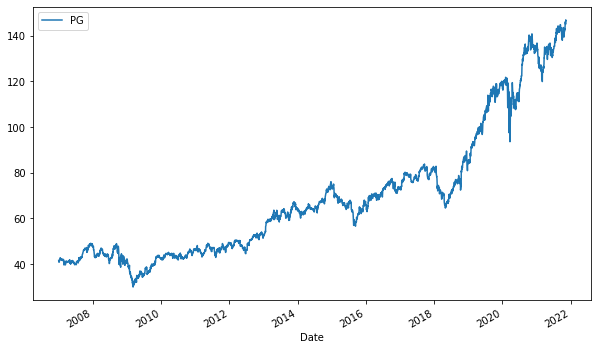

In [98]:
data.plot(figsize=(10, 6));

<AxesSubplot:xlabel='Date'>

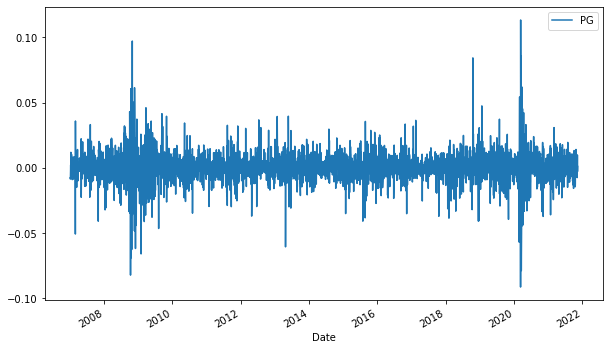

In [99]:
log_returns.plot(figsize = (10, 6))

In [100]:
u = log_returns.mean()
u

PG    0.000337
dtype: float64

In [101]:
var = log_returns.var()
var

PG    0.000137
dtype: float64

In [102]:
drift = u - (0.5 * var)
drift

PG    0.000268
dtype: float64

In [103]:
stdev = log_returns.std()
stdev

PG    0.011723
dtype: float64

******

In [104]:
type(drift)

pandas.core.series.Series

In [105]:
type(stdev)

pandas.core.series.Series

In [106]:
np.array(drift)

array([0.0002678])

In [107]:
drift.values

array([0.0002678])

In [108]:
stdev.values

array([0.01172327])

In [109]:
norm.ppf(0.95)

1.6448536269514722

In [110]:
x = np.random.rand(10, 2)
x

array([[0.16350694, 0.35164122],
       [0.5591761 , 0.0704547 ],
       [0.46518227, 0.04739754],
       [0.83943073, 0.18201948],
       [0.08695396, 0.87390641],
       [0.09222057, 0.07956237],
       [0.22312463, 0.96555788],
       [0.11297978, 0.79476447],
       [0.21774697, 0.64617488],
       [0.47508135, 0.52547564]])

In [111]:
norm.ppf(x)

array([[-0.98014634, -0.38089328],
       [ 0.14888066, -1.47241291],
       [-0.08738619, -1.67062849],
       [ 0.99212094, -0.90769582],
       [-1.35975359,  1.14505307],
       [-1.32720419, -1.40802138],
       [-0.76168294,  1.81917823],
       [-1.21083265,  0.82306493],
       [-0.77982491,  0.37501376],
       [-0.06250247,  0.06390143]])

In [112]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[ 0.80774552, -0.26163362],
       [ 0.61269868, -0.78925106],
       [ 1.46989096, -0.51469672],
       [ 0.05444817, -0.77746648],
       [ 0.50069654, -0.83145876],
       [-0.71553757,  0.38733775],
       [ 0.8951468 ,  0.27915209],
       [-0.45207852, -0.24929503],
       [-1.02633994, -0.33859839],
       [ 0.58320833,  0.80114744]])

In [113]:
t_intervals = 1000
iterations = 10

daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [114]:
daily_returns

array([[1.00604276, 0.97790234, 0.99718419, ..., 0.98955328, 0.99304611,
        0.99626288],
       [0.98991918, 0.99110473, 0.99182878, ..., 1.0060496 , 0.99780823,
        1.00491187],
       [1.01139678, 0.98526081, 0.99900668, ..., 1.01310101, 1.00526685,
        1.01337688],
       ...,
       [0.99416585, 0.99477867, 1.00867334, ..., 0.99653713, 1.01432744,
        0.98805803],
       [1.0086272 , 1.01549574, 1.00743057, ..., 1.00699742, 1.00792913,
        0.99762446],
       [1.03005981, 1.00331208, 0.99876734, ..., 1.00559262, 1.02953302,
        0.98173366]])

***

$$
S_t = S_0 \mathbin{\cdot} daily\_return_t
$$
<br />

$$
S_{t+1} = S_t \mathbin{\cdot} daily\_return_{t+1}
$$

<br /> 
$$...$$
<br />  

$$
S_{t+999} = S_{t+998} \mathbin{\cdot} daily\_return_{t+999}
$$



In [115]:
#Given day t we can get the stock at day t+1 and so on
S0 = data.iloc[-1] # we will took the day today to predict next 1000 days
S0

PG    146.559998
Name: 2021-11-12 00:00:00, dtype: float64

In [116]:
price_list = np.zeros_like(daily_returns)

In [117]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [118]:
price_list[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [119]:
price_list[0] = S0
price_list

array([[146.55999756, 146.55999756, 146.55999756, ..., 146.55999756,
        146.55999756, 146.55999756],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [120]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [121]:
price_list

array([[146.55999756, 146.55999756, 146.55999756, ..., 146.55999756,
        146.55999756, 146.55999756],
       [145.08255291, 145.25630747, 145.36242408, ..., 147.44662658,
        146.23877244, 147.2798815 ],
       [146.7360273 , 143.11534787, 145.21803269, ..., 149.37832566,
        147.00899038, 149.25002658],
       ...,
       [176.51802236, 332.70195102, 159.22624068, ..., 219.93900546,
        242.46308698, 205.33305392],
       [178.04087935, 337.85741418, 160.40938284, ..., 221.47801005,
        244.38560729, 204.845277  ],
       [183.39275491, 338.97642552, 160.21165268, ..., 222.7166524 ,
        251.60305227, 201.10350254]])

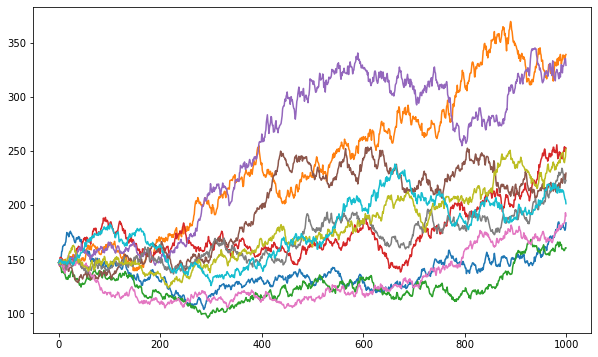

In [122]:
plt.figure(figsize=(10,6))
plt.plot(price_list);

In [ ]:
# we obtained 10 possible paths of the expected stock prices of PG. Starting from last day we call there 
# as iteration as computation will be done 10 times